In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
x = np.arange(-80,81,0.5)
y = x**2+5*x+3

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
model=keras.Sequential()
model.add(keras.layers.Input(shape=[1]))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1))

In [27]:
optimizer=keras.optimizers.RMSprop(learning_rate=0.001)
loss=keras.losses.MeanSquaredError()
metric= keras.metrics.RootMeanSquaredError()
model.compile(optimizer=optimizer,loss=loss,metrics=[metric])

In [36]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=250,restore_best_weights=True)

In [37]:
hist=model.fit(x_train,y_train,batch_size=64,epochs=1200,callbacks=[early_stop],validation_data=(x_test,y_test))

Epoch 1/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 16973.0332 - root_mean_squared_error: 119.9647 - val_loss: 91717.5000 - val_root_mean_squared_error: 302.8490
Epoch 2/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 77576.0703 - root_mean_squared_error: 277.7098 - val_loss: 126460.2266 - val_root_mean_squared_error: 355.6125
Epoch 3/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54086.0664 - root_mean_squared_error: 226.1440 - val_loss: 7025.7607 - val_root_mean_squared_error: 83.8198
Epoch 4/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6142.0322 - root_mean_squared_error: 78.3654 - val_loss: 18232.8535 - val_root_mean_squared_error: 135.0291
Epoch 5/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14075.4668 - root_mean_squared_error: 117.3727 - val_loss: 23406.7598 - val_root_mean_squared_error: 152.9927
Epoch 6/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 28127.2422 - root_mean_squared_error: 167.2815 - val_loss: 11701.4893 - val_root_mean_squared_error

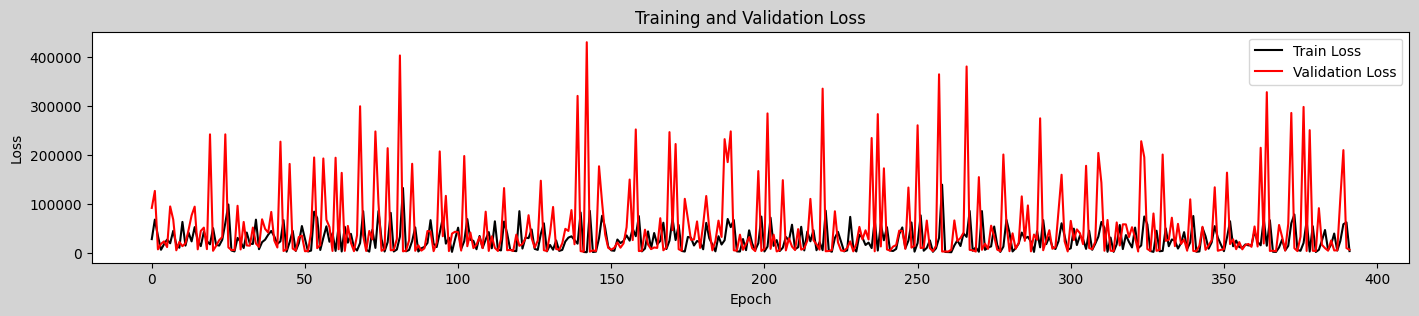

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 3),facecolor='lightgray')
plt.plot(hist.history['loss'], label='Train Loss',color='black')
plt.plot(hist.history['val_loss'], label='Validation Loss',color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



In [52]:
y_pred=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


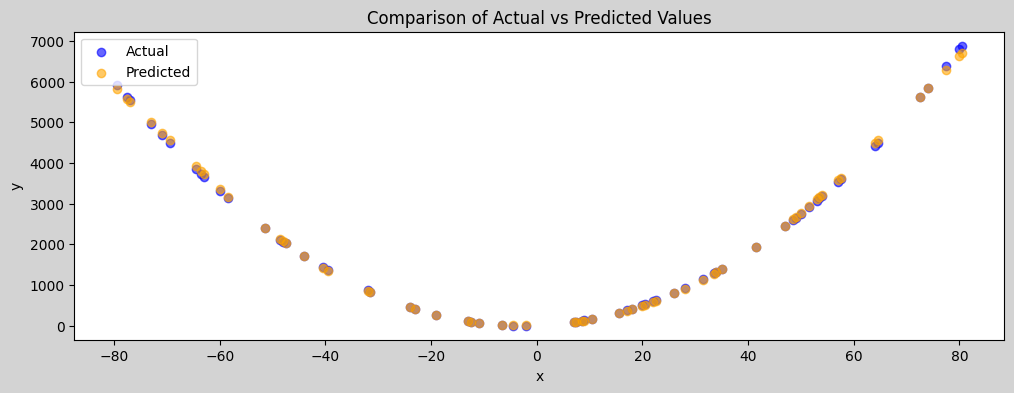

In [61]:
plt.figure(figsize=(12,4), facecolor='lightgray')
plt.scatter(x_test, y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(x_test, y_pred, label='Predicted', color='orange', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Actual vs Predicted Values")
plt.legend()
plt.show()

